# The dynamics of financial returns

The chosen stocks are:

- Google [GOOGL]
- Citigroup [C]
- Fidelity [FIS]
- Intuitive Surgical [ISRG]
- Kraft Heinz [KHC]

The index is the S&P 500 [SPX]

In [2]:
# Importing the necessary package

using MarketData, Statistics, Plots, DataFrames, LinearAlgebra, TimeSeries

Precompiling MarketData
[ Info: Precompiling MarketData [945b72a4-3b13-509d-9b46-1525bb5c06de]
ERROR: LoadError: IOError: could not spawn setenv(`lld.exe -flavor gnu -m i386pep -Bdynamic --enable-auto-image-base --allow-multiple-definition '' -shared -o 'C:\Users\Hp\.julia\compiled\v1.10\TimeSeries\jl_CCDC.tmp' --whole-archive 'C:\Users\Hp\.julia\compiled\v1.10\TimeSeries\jl_CCCC.tmp' --no-whole-archive '-LC:\Users\Hp\.julia\juliaup\julia-1.10.2+0.x64.w64.mingw32\lib\julia' '-LC:\Users\Hp\.julia\juliaup\julia-1.10.2+0.x64.w64.mingw32\bin' -ljulia -ljulia-internal -lopenlibm -lssp -lgcc_s -lgcc -lmsvcrt`,["WINDIR=C:\\WINDOWS", "PATH=C:\\Users\\Hp\\.julia\\juliaup\\julia-1.10.2+0.x64.w64.mingw32\\lib\\julia;C:\\Users\\Hp\\.julia\\juliaup\\julia-1.10.2+0.x64.w64.mingw32\\bin;C:\\Program Files\\Python312\\Scripts\\;C:\\Program Files\\Python312\\;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\java8path;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Program Files\\Ec

LoadError: Failed to precompile MarketData [945b72a4-3b13-509d-9b46-1525bb5c06de] to "C:\\Users\\Hp\\.julia\\compiled\\v1.10\\MarketData\\jl_B4CD.tmp".

In [ ]:
start = DateTime(2014, 1, 1)

2014-01-01T00:00:00

In [ ]:
# Getting the relevant stocks

GOOGL = yahoo(:GOOGL, YahooOpt(period1 = start))

2609×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2014-01-02 to 2024-05-14
┌────────────┬─────────┬─────────┬─────────┬─────────┬──────────┬───────────┐
│            │ Open    │ High    │ Low     │ Close   │ AdjClose │ Volume    │
├────────────┼─────────┼─────────┼─────────┼─────────┼──────────┼───────────┤
│ 2014-01-02 │ 27.9144 │ 27.9717 │ 27.7342 │ 27.8559 │  27.8559 │ 7.27831e7 │
│ 2014-01-03 │ 27.9029 │ 27.9512 │ 27.6509 │ 27.6527 │  27.6527 │ 6.66013e7 │
│ 2014-01-06 │ 27.8531 │ 27.9995 │ 27.6887 │  27.961 │   27.961 │ 7.07012e7 │
│ 2014-01-07 │ 28.1532 │ 28.5208 │ 28.0571 │    28.5 │     28.5 │ 1.02002e8 │
│ 2014-01-08 │ 28.6787 │ 28.7117 │ 28.3606 │ 28.5593 │  28.5593 │ 8.96103e7 │
│ 2014-01-09 │ 28.6146 │ 28.6341 │ 28.1672 │ 28.2843 │  28.2843 │ 8.32966e7 │
│ 2014-01-10 │ 28.5055 │ 28.5055 │ 28.0843 │ 28.2828 │  28.2828 │ 8.56543e7 │
│ 2014-01-13 │ 28.1899 │ 28.7015 │ 27.9572 │ 28.1026 │  28.1026 │ 9.66592e7 │
│     ⋮      │    ⋮    │    ⋮    │    ⋮    │    ⋮    │    ⋮     │

In [ ]:
C = yahoo(:C, YahooOpt(period1 = start))

2609×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2014-01-02 to 2024-05-14
┌────────────┬───────┬───────┬───────┬───────┬──────────┬───────────┐
│            │ Open  │ High  │ Low   │ Close │ AdjClose │ Volume    │
├────────────┼───────┼───────┼───────┼───────┼──────────┼───────────┤
│ 2014-01-02 │ 52.03 │  52.4 │ 51.81 │ 52.27 │  40.7211 │ 1.64797e7 │
│ 2014-01-03 │ 52.39 │ 53.47 │ 52.31 │  53.4 │  41.6014 │ 2.68849e7 │
│ 2014-01-06 │ 53.62 │ 54.29 │ 53.43 │ 53.81 │  41.9208 │ 2.85031e7 │
│ 2014-01-07 │ 54.59 │ 54.72 │ 53.78 │ 54.18 │  42.2091 │ 2.88404e7 │
│ 2014-01-08 │ 54.29 │  55.0 │  54.2 │ 54.81 │  42.6999 │ 2.59898e7 │
│ 2014-01-09 │  55.0 │ 55.28 │ 54.76 │  55.2 │  43.0037 │ 2.18037e7 │
│ 2014-01-10 │ 55.03 │ 55.09 │  54.3 │ 54.72 │  42.6298 │ 2.24859e7 │
│ 2014-01-13 │ 54.46 │ 54.66 │ 53.44 │ 53.72 │  41.8507 │ 2.11103e7 │
│     ⋮      │   ⋮   │   ⋮   │   ⋮   │   ⋮   │    ⋮     │     ⋮     │
│ 2024-05-06 │ 62.06 │ 62.94 │ 61.72 │ 62.81 │    62.81 │ 1.33867e7 │
│ 2024-05-07 

In [ ]:
FIS = yahoo(:FIS, YahooOpt(period1 = start))

2609×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2014-01-02 to 2024-05-14
┌────────────┬───────┬───────┬───────┬───────┬──────────┬──────────┐
│            │ Open  │ High  │ Low   │ Close │ AdjClose │ Volume   │
├────────────┼───────┼───────┼───────┼───────┼──────────┼──────────┤
│ 2014-01-02 │  53.4 │ 53.55 │ 52.79 │  53.0 │  44.7481 │ 986800.0 │
│ 2014-01-03 │ 53.01 │ 53.61 │ 52.87 │ 53.15 │  44.8747 │ 969300.0 │
│ 2014-01-06 │ 53.23 │ 53.43 │ 52.78 │ 52.85 │  44.6214 │ 790700.0 │
│ 2014-01-07 │ 52.91 │ 53.11 │ 52.78 │ 52.95 │  44.7059 │ 855700.0 │
│ 2014-01-08 │ 53.02 │ 53.14 │ 52.84 │  53.0 │  44.7481 │ 1.7718e6 │
│ 2014-01-09 │  53.1 │ 53.25 │ 52.91 │ 53.02 │   44.765 │ 621900.0 │
│ 2014-01-10 │ 53.17 │ 53.23 │  52.7 │  53.0 │  44.7481 │ 697100.0 │
│ 2014-01-13 │ 52.82 │ 53.08 │ 51.93 │ 52.04 │  43.9375 │ 1.2134e6 │
│     ⋮      │   ⋮   │   ⋮   │   ⋮   │   ⋮   │    ⋮     │    ⋮     │
│ 2024-05-06 │ 71.16 │  71.4 │ 70.38 │ 70.45 │    70.45 │ 5.2043e6 │
│ 2024-05-07 │  73.0 │ 75.

In [ ]:
ISRG = yahoo(:ISRG, YahooOpt(period1 = start))

2609×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2014-01-02 to 2024-05-14
┌────────────┬─────────┬─────────┬─────────┬─────────┬──────────┬───────────┐
│            │ Open    │ High    │ Low     │ Close   │ AdjClose │ Volume    │
├────────────┼─────────┼─────────┼─────────┼─────────┼──────────┼───────────┤
│ 2014-01-02 │ 42.6267 │ 42.6267 │   42.03 │ 42.2233 │  42.2233 │  4.1481e6 │
│ 2014-01-03 │ 42.2611 │ 42.5189 │ 41.4156 │ 41.4956 │  41.4956 │   3.105e6 │
│ 2014-01-06 │   41.44 │ 41.9178 │ 41.1144 │ 41.2156 │  41.2156 │  3.5514e6 │
│ 2014-01-07 │ 41.2656 │ 41.8767 │ 41.1944 │ 41.5289 │  41.5289 │  3.4929e6 │
│ 2014-01-08 │ 41.6011 │ 42.2922 │ 41.5633 │ 42.2733 │  42.2733 │  4.4856e6 │
│ 2014-01-09 │ 42.3189 │ 43.3167 │   42.19 │ 42.9756 │  42.9756 │  5.0292e6 │
│ 2014-01-10 │ 42.9411 │ 47.1756 │ 42.8078 │ 46.6833 │  46.6833 │ 1.34658e7 │
│ 2014-01-13 │ 45.7856 │ 46.0833 │ 43.5578 │ 43.6744 │  43.6744 │  9.8172e6 │
│     ⋮      │    ⋮    │    ⋮    │    ⋮    │    ⋮    │    ⋮     │

In [ ]:
KHC = yahoo(:KHC, YahooOpt(period1 = start))

2231×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2015-07-06 to 2024-05-14
┌────────────┬───────┬────────┬────────┬───────┬──────────┬───────────┐
│            │ Open  │ High   │ Low    │ Close │ AdjClose │ Volume    │
├────────────┼───────┼────────┼────────┼───────┼──────────┼───────────┤
│ 2015-07-06 │  71.0 │  74.29 │   71.0 │ 72.96 │  50.4776 │  3.8097e6 │
│ 2015-07-07 │ 73.73 │  74.71 │  72.96 │ 74.63 │   51.633 │  5.7943e6 │
│ 2015-07-08 │  74.3 │   75.5 │  74.04 │  75.4 │  52.1657 │  4.2766e6 │
│ 2015-07-09 │ 76.47 │ 77.066 │   74.5 │  74.8 │  51.7506 │  4.2671e6 │
│ 2015-07-10 │ 75.05 │   77.8 │   75.0 │ 77.31 │  53.4871 │   4.983e6 │
│ 2015-07-13 │  79.5 │   79.7 │  77.91 │ 78.83 │  54.5387 │  9.0789e6 │
│ 2015-07-14 │ 79.45 │   79.5 │  77.65 │  78.0 │  53.9645 │ 1.87461e7 │
│ 2015-07-15 │ 77.65 │  78.17 │   76.4 │ 76.71 │   53.072 │  6.3305e6 │
│     ⋮      │   ⋮   │   ⋮    │   ⋮    │   ⋮   │    ⋮     │     ⋮     │
│ 2024-05-06 │ 36.41 │  36.44 │  35.53 │ 35.74 │    35.74 │

In [ ]:
SPX = yahoo("^GSPC", YahooOpt(period1 = start))

2609×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2014-01-02 to 2024-05-14
┌────────────┬─────────┬─────────┬─────────┬─────────┬──────────┬───────────┐
│            │ Open    │ High    │ Low     │ Close   │ AdjClose │ Volume    │
├────────────┼─────────┼─────────┼─────────┼─────────┼──────────┼───────────┤
│ 2014-01-02 │ 1845.86 │ 1845.86 │ 1827.74 │ 1831.98 │  1831.98 │  3.0806e9 │
│ 2014-01-03 │ 1833.21 │ 1838.24 │ 1829.13 │ 1831.37 │  1831.37 │ 2.77427e9 │
│ 2014-01-06 │ 1832.31 │ 1837.16 │ 1823.73 │ 1826.77 │  1826.77 │ 3.29485e9 │
│ 2014-01-07 │ 1828.71 │  1840.1 │ 1828.71 │ 1837.88 │  1837.88 │ 3.51175e9 │
│ 2014-01-08 │  1837.9 │ 1840.02 │  1831.4 │ 1837.49 │  1837.49 │ 3.65214e9 │
│ 2014-01-09 │  1839.0 │ 1843.23 │ 1830.38 │ 1838.13 │  1838.13 │ 3.58115e9 │
│ 2014-01-10 │ 1840.06 │ 1843.15 │ 1832.43 │ 1842.37 │  1842.37 │ 3.33571e9 │
│ 2014-01-13 │ 1841.26 │ 1843.45 │ 1815.52 │  1819.2 │   1819.2 │ 3.59135e9 │
│     ⋮      │    ⋮    │    ⋮    │    ⋮    │    ⋮    │    ⋮     │

In [ ]:
# Take the closing price

PtGOOGL = GOOGL["Close"]
PtC = C["Close"]
PtFIS = FIS["Close"]
PtISRG = ISRG["Close"]
PtKHC = KHC["Close"]
PtSPX = SPX["Close"]


2609×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2014-01-02 to 2024-05-14
┌────────────┬─────────┐
│            │ Close   │
├────────────┼─────────┤
│ 2014-01-02 │ 1831.98 │
│ 2014-01-03 │ 1831.37 │
│ 2014-01-06 │ 1826.77 │
│ 2014-01-07 │ 1837.88 │
│ 2014-01-08 │ 1837.49 │
│ 2014-01-09 │ 1838.13 │
│ 2014-01-10 │ 1842.37 │
│ 2014-01-13 │  1819.2 │
│     ⋮      │    ⋮    │
│ 2024-05-06 │ 5180.74 │
│ 2024-05-07 │  5187.7 │
│ 2024-05-08 │ 5187.67 │
│ 2024-05-09 │ 5214.08 │
│ 2024-05-10 │ 5222.68 │
│ 2024-05-13 │ 5221.42 │
│ 2024-05-14 │ 5246.68 │
└────────────┴─────────┘
       2594 rows omitted

In [ ]:
# Google
RtGOOGL = diff(log.(PtGOOGL))
RrGOOGL = diff(PtGOOGL) ./ PtGOOGL[1:end-1]

RtC = diff(log.(PtC))
RtFIS = diff(log.(PtFIS))
RtISRG = diff(log.(PtISRG))
RtKHC = diff(log.(PtKHC))
RtSPX = diff(log.(PtSPX))

RrC = diff(PtC) ./ PtC[1:end-1]
RrFIS = diff(PtFIS) ./ PtFIS[1:end-1]
RrISRG = diff(PtISRG) ./ PtISRG[1:end-1]
RrKHC = diff(PtKHC) ./ PtKHC[1:end-1]
RrSPX = diff(PtSPX) ./ PtSPX[1:end-1]


2607×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2014-01-03 to 2024-05-13
┌────────────┬──────────────┐
│            │ Close_Close  │
├────────────┼──────────────┤
│ 2014-01-03 │ -0.000333076 │
│ 2014-01-06 │  -0.00251809 │
│ 2014-01-07 │     0.006045 │
│ 2014-01-08 │ -0.000212254 │
│ 2014-01-09 │  0.000348188 │
│ 2014-01-10 │   0.00230138 │
│ 2014-01-13 │   -0.0127364 │
│ 2014-01-14 │    0.0107022 │
│     ⋮      │      ⋮       │
│ 2024-05-03 │     0.012401 │
│ 2024-05-06 │    0.0102206 │
│ 2024-05-07 │   0.00134163 │
│ 2024-05-08 │  -5.83557e-6 │
│ 2024-05-09 │   0.00506516 │
│ 2024-05-10 │   0.00164668 │
│ 2024-05-13 │ -0.000241362 │
└────────────┴──────────────┘
            2592 rows omitted

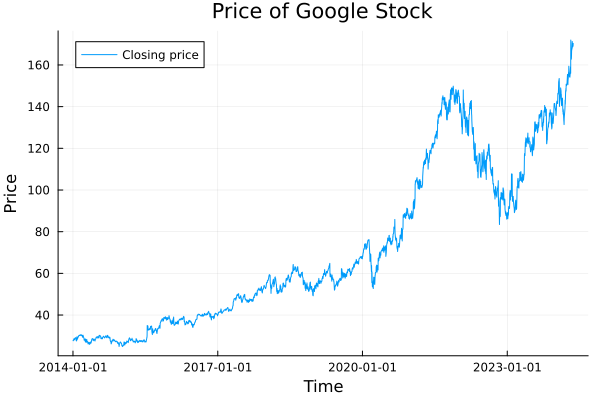

In [ ]:
plot(PtGOOGL, xlabel = "Time", ylabel = "Price", label = "Closing price")
title!("Price of Google Stock")

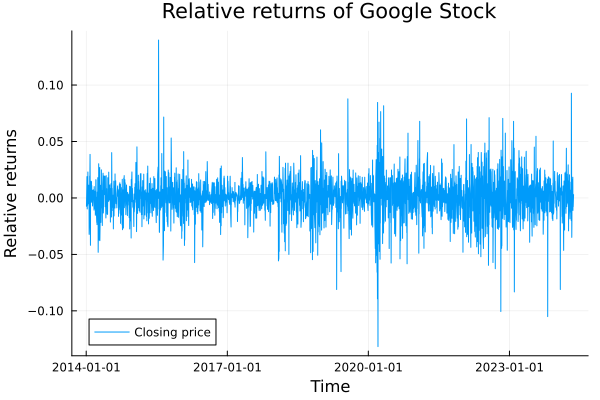

In [ ]:
plot(RrGOOGL, xlabel = "Time", ylabel = "Relative returns", label = "Closing price")
title!("Relative returns of Google Stock")

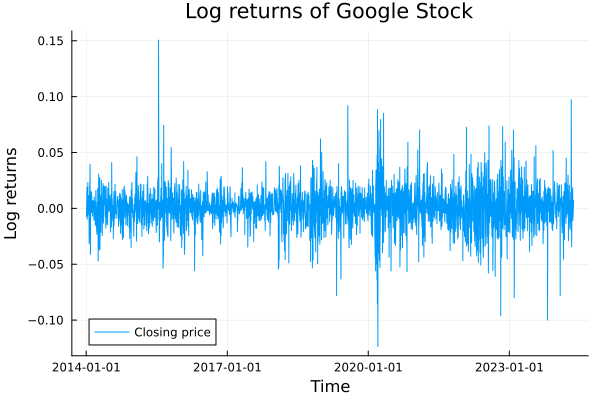

In [ ]:
plot(RtGOOGL, xlabel = "Time", ylabel = "Log returns", label = "Closing price")
title!("Log returns of Google Stock")

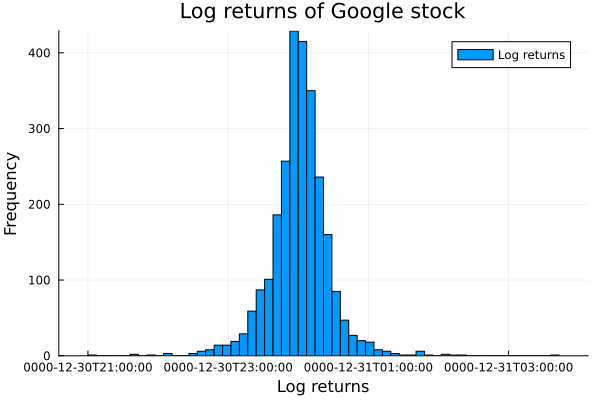

In [ ]:
histogram(RtGOOGL, label = "Log returns", ylabel = "Frequency", xlabel = "Log returns")
title!("Log returns of Google stock")

In [3]:
# Routine that reports the mean

function Routine(data)

    # Compute the mean
    v = values(data)
    n = length(v)
    i = ones(n)
    mean = inv(i'i)i'v

    # Compute the median
    sorted = sort(v)

    if mod(n, 2) != 0
        
        median = sorted[Int((n + 1) / 2)]
    else 

        median = (sorted[Int(n / 2)] + sorted[Int((n / 2) + 1)]) / 2
    end

    # Compute the variance
    variance = 1/n * sum((x - mean)^2 for x in v)

    return(mean, median, variance)
end




Routine (generic function with 1 method)

In [4]:
Routine(RtGOOGL)

LoadError: UndefVarError: `RtGOOGL` not defined

In [ ]:
a = values(RtGOOGL)

mean(a)

UndefVarError: UndefVarError: `RtGOOGL` not defined